<a href="https://colab.research.google.com/github/Leslyndizeye/FORMATIVE-ASSIGNMENT-ADVANCED-LINEAR-ALGEBRA-PCA-/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Allow uploading file that contains datasets

In [4]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving fuel_econ.csv to fuel_econ.csv


# Initialize the file to a variable

In [5]:
df = pd.read_csv('fuel_econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


# Selecting only numeric columns from the dataset

In [11]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.drop("id", axis=1, inplace=True)

# Convert the DataFrame to a NumPy array
numeric_data = df_numeric.to_numpy()

df_numeric.head()

,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,2013,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,2013,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,2013,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,2013,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,2013,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


# Standardizing the data

In [12]:
data = numeric_data

mean = np.mean(data, axis=0)
std_deviation = np.std(data, axis=0)

standardized_data = (data - mean) / std_deviation
standardized_data[:5]

array([[-1.47583548,  0.28310163,  0.65053594,  1.46709627, -1.21737766,
        -0.85996012, -0.85242986, -1.29062982, -1.39247459, -1.00832279,
         1.02283829, -0.95057953, -0.94575548],
       [-1.47583548, -0.78181585, -0.72799833,  1.86476224, -1.21737766,
         0.00642675, -0.11743408,  0.18494654, -0.03920038,  0.07186379,
        -0.29854998,  0.1886082 ,  0.1942578 ],
       [-1.47583548,  0.28310163,  0.49736547,  1.86476224, -1.21737766,
        -0.69441634, -0.75324472, -0.5920197 , -0.85174957, -0.68633929,
         0.56793413, -0.38098566, -0.37574884],
       [-1.47583548,  0.28310163,  0.49736547,  1.86476224, -1.21737766,
        -0.78280029, -0.830286  , -0.82738386, -1.02758796, -0.81865124,
         0.752062  , -0.38098566, -0.37574884],
       [-1.47583548, -0.78181585, -0.42165738, -0.62727784,  0.73489021,
         0.47108294,  0.43314691,  0.96751585,  0.99253135,  0.64805881,
        -0.72096098,  1.32779592,  1.33427108]])

# Find the covariance matrix

In [13]:
cov_matrix = np.cov(standardized_data, rowvar=False)
cov_matrix

array([[ 1.00025458, -0.05532701, -0.07044161,  0.00623397, -0.03365174,
         0.06806739,  0.06675938,  0.07330836,  0.07766039,  0.07201181,
        -0.0811853 , -0.1498676 , -0.14517775],
       [-0.05532701,  1.00025458,  0.93411019,  0.24763384, -0.00426546,
        -0.69327904, -0.66619842, -0.76646982, -0.77169964, -0.73821112,
         0.84848979, -0.78405759, -0.78201448],
       [-0.07044161,  0.93411019,  1.00025458,  0.2594021 ,  0.02207729,
        -0.71366074, -0.6863403 , -0.78418374, -0.78865771, -0.75859024,
         0.85559254, -0.7936343 , -0.79141752],
       [ 0.00623397,  0.24763384,  0.2594021 ,  1.00025458, -0.66581137,
        -0.27817962, -0.27261515, -0.29688365, -0.29858023, -0.29095711,
         0.28727323, -0.2961638 , -0.29323103],
       [-0.03365174, -0.00426546,  0.02207729, -0.66581137,  1.00025458,
         0.03519659,  0.03787859,  0.07497068,  0.07746161,  0.04734493,
        -0.05016567,  0.06489226,  0.06527952],
       [ 0.06806739, -0.693279

# Eigen decomposition

In [14]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display results
eigenvalues, eigenvectors

(array([8.95438503e+00, 1.60217406e+00, 1.08130409e+00, 6.69846988e-01,
        3.01556646e-01, 1.59640330e-01, 1.22456393e-01, 6.40188482e-02,
        3.18517161e-02, 9.28848342e-03, 4.25474935e-03, 2.14474101e-03,
        3.87495652e-04]),
 array([[-1.00979556e-02, -7.71359373e-02, -9.52382829e-01,
          3.36970085e-02, -3.06515611e-02, -9.83646387e-02,
          2.11590634e-01, -3.29899309e-03, -1.73263432e-01,
          1.29538785e-02, -1.13954835e-02,  7.31999006e-03,
          3.38792348e-03],
        [ 2.81635408e-01,  6.02604172e-02,  3.86142993e-02,
          5.99579324e-01,  9.73891078e-02,  8.39615393e-02,
          2.52347721e-01, -6.79369876e-01,  1.16630151e-01,
         -1.93458621e-02, -1.62995878e-02, -7.96619500e-03,
          8.82700851e-04],
        [ 2.86111823e-01,  7.03455458e-02,  5.28436618e-02,
          5.66831121e-01, -1.05200107e-02,  1.29682332e-02,
          2.41887602e-01,  7.26445903e-01,  4.71185434e-02,
         -8.32926043e-04, -3.25709036e-03, -

# Sorting principal component

In [15]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvectors, sorted_eigenvalues

(array([[-1.00979556e-02, -7.71359373e-02, -9.52382829e-01,
          3.36970085e-02, -3.06515611e-02, -9.83646387e-02,
          2.11590634e-01, -3.29899309e-03, -1.73263432e-01,
          1.29538785e-02, -1.13954835e-02,  7.31999006e-03,
          3.38792348e-03],
        [ 2.81635408e-01,  6.02604172e-02,  3.86142993e-02,
          5.99579324e-01,  9.73891078e-02,  8.39615393e-02,
          2.52347721e-01, -6.79369876e-01,  1.16630151e-01,
         -1.93458621e-02, -1.62995878e-02, -7.96619500e-03,
          8.82700851e-04],
        [ 2.86111823e-01,  7.03455458e-02,  5.28436618e-02,
          5.66831121e-01, -1.05200107e-02,  1.29682332e-02,
          2.41887602e-01,  7.26445903e-01,  4.71185434e-02,
         -8.32926043e-04, -3.25709036e-03, -1.79507819e-02,
         -5.97988436e-03],
        [ 1.13801165e-01, -6.68122708e-01,  7.20384481e-02,
          1.09900028e-01, -7.14176115e-01, -6.33337986e-02,
         -7.86389060e-02, -5.32264657e-02, -1.62163203e-02,
          4.9181118

# Dynamically select the number of principal components based on explained variance.

In [17]:
# Step 1: Calculate the cumulative sum of eigenvalues
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)  # Explained variance per component
cumulative_variance = np.cumsum(explained_variance)  # Cumulative explained variance

# Step 2: Pick number of components based on cumulative variance
num_components = np.argmax(cumulative_variance >= 0.90) + 1

num_components

4

# Projecting Data onto Principal Components

In [21]:
num_components = num_components

# Project the standardized data onto the selected principal components
reduced_data = np.dot(standardized_data, top_eigenvectors)

# Display the first few rows of the reduced data
reduced_data[:5]

array([[ 3.15569908, -1.51331462,  1.51853348, -0.44635715],
       [-0.42394993, -2.13421661,  1.58333276, -0.79808389],
       [ 2.05534082, -1.8514677 ,  1.65623972, -0.2065853 ],
       [ 2.34295771, -1.82948376,  1.69358725, -0.31988825],
       [-2.63486937,  0.86693469,  1.59991376, -0.13275968]])

# Plotting the original data

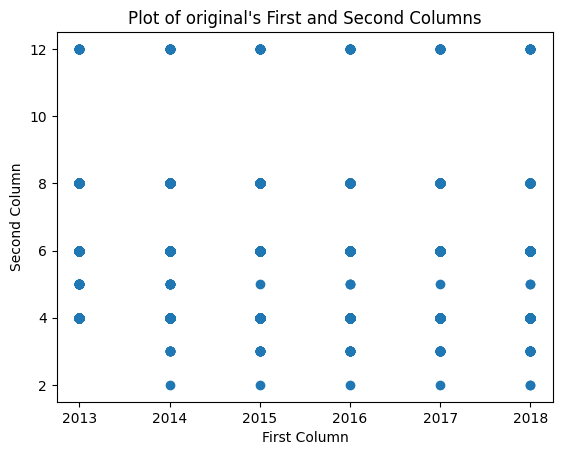

In [22]:
# Plotting original data, first and second column
plt.scatter(numeric_data[:, 0], numeric_data[:, 1])
plt.title('Plot of original\'s First and Second Columns')
plt.xlabel('First Column')
plt.ylabel('Second Column')
plt.show()

# Plotting reduced data

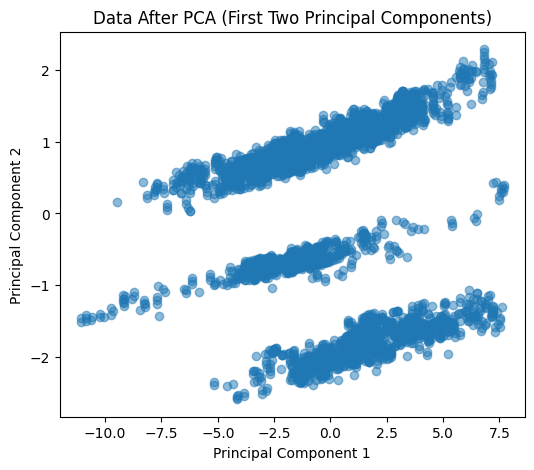

In [20]:
# Assuming you have reduced_data from PCA projection
plt.figure(figsize=(6, 5))

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.title("Data After PCA (First Two Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()